<a href="https://colab.research.google.com/github/Ruqyai/AI_4_Design/blob/master/AI_4_Design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Introduction

This notebook contains filter implementations like instagram filters , the filters I have tried to implement are : 
<br>1.'Clarendon'
<br>2.'Moon'
<br>3.'Slumber'
<br>4.'Perpetua'
<br>5.'Lo-Fi'
<br>
**The used approach for implementing these filters is :**
<br>
1. change the values of channels in RGB color tybe
<br>
2. change the values of channels in HSV color tybe
<br>
3. change the values of channels in LAB color tybe
<br>
4. improving contrast with CLAHE(Contrast Limited Adaptive Histogram Equalization)

#2.Script
##2.1 packages

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

##2.2 some useful functions
I have implemented These functions to help me with filtering.

###2.2.1 adjusting contrast with CLAHE

In [0]:
def improve_contrast(img):
    lab_image=cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    ch_l,ch_a,ch_b=cv2.split(lab_image)
    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
    ch_l = clahe.apply(ch_l)
    new_img=cv2.merge((ch_l,ch_a,ch_b))
    # you must go back to RGB to show image with pyplot
    show_img=cv2.cvtColor(new_img, cv2.COLOR_LAB2RGB)
    return show_img

###2.2.1 increasing brightness

In [0]:
def increase_brightness(img,value):
    hsv_image=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    ch_h,ch_s,ch_v=cv2.split(hsv_image)
    limit = 255 - value
    ch_v[ch_v > limit] = 255
    ch_v[ch_v <= limit] += value
    new_img=cv2.merge((ch_h,ch_s,ch_v))
    # you must go back to RGB to show image with pyplot
    show_img=cv2.cvtColor(new_img, cv2.COLOR_HSV2RGB)
    return show_img

###2.2.2 decreasing brightness

In [0]:
def decrease_brightness(img,value):
    hsv_image=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    ch_h,ch_s,ch_v=cv2.split(hsv_image)
    limit = 0 + value
    ch_v[ch_v < limit] = 0
    ch_v[ch_v >= limit] -= value
    new_img=cv2.merge((ch_h,ch_s,ch_v))
    # you must go back to RGB to show image with pyplot
    show_img=cv2.cvtColor(new_img, cv2.COLOR_HSV2RGB)
    return show_img

###2.2.3 increasing white color

In [0]:
def increase_saturation(img,value):
    hsv_image=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    ch_h,ch_s,ch_v=cv2.split(hsv_image)
    limit = 255 - value
    ch_s[ch_s > limit] = 255
    ch_s[ch_s <= limit] += value
    new_img=cv2.merge((ch_h,ch_s,ch_v))
    # you must go back to RGB to show image with pyplot
    show_img=cv2.cvtColor(new_img, cv2.COLOR_HSV2RGB)
    return show_img

###2.2.4 increasing red color

In [0]:
def increase_red(img,value):
    ch_b,ch_g,ch_r=cv2.split(img)
    limit =255-value
    ch_r[ch_r>limit]=255 
    ch_r[ch_r<=limit]+=value
    new_img=cv2.merge((ch_b,ch_g,ch_r))
    # you must go back to RGB to show image with pyplot
    show_img=cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
    return show_img

###2.2.5 decrease green color

In [0]:
def decrease_green(img,value):
    ch_b,ch_g,ch_r=cv2.split(img)
    limit=0+value
    ch_g[ch_g < limit]=0 
    ch_g[ch_g >= limit] -= value
    new_img=cv2.merge((ch_b,ch_g,ch_r))
    # you must go back to RGB to show image with pyplot
    show_img=cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
    return show_img

###2.2.6 increase A channel in LAB color

L : Lightness from black(0)to white(100)
A : from green(-100) to red(100)
B : from blue(-100) to yellow(100)

In [0]:
def increase_a_LAB(img,value):
    lab_image=cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    ch_l,ch_a,ch_b=cv2.split(lab_image)
    ch_a[:,:]+=value
    new_img=cv2.merge((ch_l,ch_a,ch_b))
    # you must go back to RGB to show image with pyplot
    show_img=cv2.cvtColor(new_img, cv2.COLOR_LAB2RGB)
    return show_img

##2.3 the insta_like function

In [0]:

def insta_like(image,filter_name):
    '''
    Arguments:
    image : string contains the path of the input image .
    filter_name : string contains the name of the required filter,
    it should be one of these : '','','','',or'' .

    Returns:
    output image
    '''
    img=cv2.imread(image,1)
    
    if filter_name=='Clarendon':
        
        # increase shadows
        new_img=improve_contrast(img)
        # increase brightness
        new_img=cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)
        bright_img=increase_brightness(new_img,60)
        show_img=bright_img
        
    elif filter_name=='Moon':
        hsv_image=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        ch_h,ch_s,ch_v=cv2.split(hsv_image)
        ch_s[:,:] =ch_s[:,:]* 0.1
        new_img=cv2.merge((ch_h,ch_s,ch_v))
        # you must go back to RGB to show image with pyplot
        show_img=cv2.cvtColor(new_img, cv2.COLOR_HSV2RGB)
        
    elif filter_name=='Slumber':
        show_img=improve_contrast(img)
        
        
    elif filter_name=='Perpetua':
        hsv_image=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        ch_h,ch_s,ch_v=cv2.split(hsv_image)
        ch_v[:,:] =ch_v[:,:]* 0.85
        new_img=cv2.merge((ch_h,ch_s,ch_v))
        # you must go back to RGB to show image with pyplot
        show_img=cv2.cvtColor(new_img, cv2.COLOR_HSV2RGB)
        
    elif filter_name=='Lo-Fi':
        # increase shadows
        new_img=improve_contrast(img)
        # increase brightness
        new_img=cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)
        new_img=increase_brightness(new_img,40)
        new_img=cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)
        new_img=increase_saturation(new_img,20)
        show_img=new_img
    fig = plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(show_img,interpolation='gaussian')

## 3.Input image

In [44]:
from google.colab import files

img_name = files.upload()

Saving contents3.jpg to contents3 (1).jpg


In [0]:
img_name= list(img_name)[0]


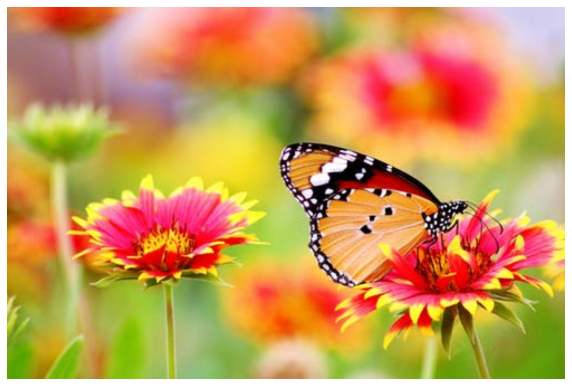

In [46]:
img= cv2.imread(img_name,1)
# you must go back to RGB to show image with pyplot
show_img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(show_img,interpolation='gaussian')

###3.1 Clarendon filter

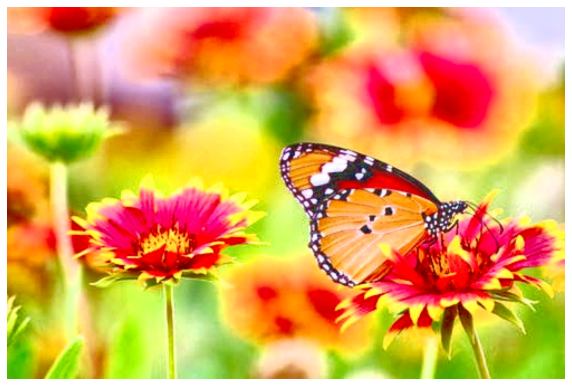

In [47]:
insta_like(img_name,'Clarendon')

###3.2 Moon filter

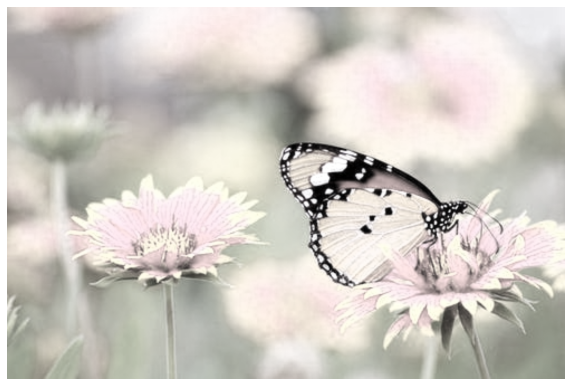

In [48]:
insta_like(img_name,'Moon')

###3.3 Slumber filter

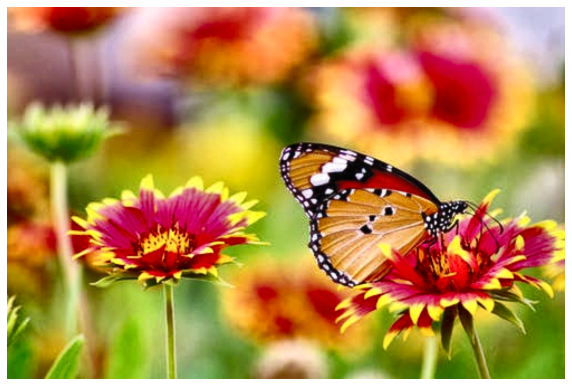

In [49]:
insta_like(img_name,'Slumber')

###3.4 Perpetua filter

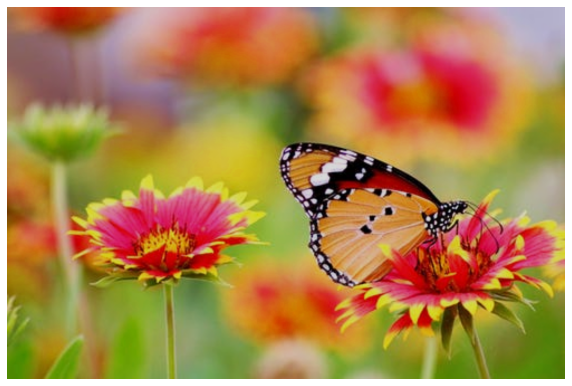

In [50]:
insta_like(img_name,'Perpetua')

###3.5 Lo-Fi filter

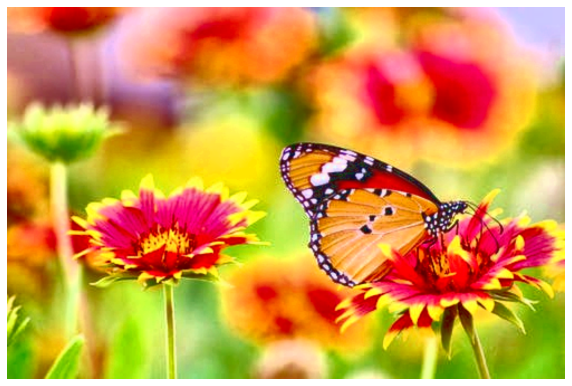

In [51]:
insta_like(img_name,'Lo-Fi')



---

#NEW SECTION

---



#Transfer_From_Style

In [0]:
!git clone https://github.com/titu1994/Neural-Style-Transfer.git

Cloning into 'Neural-Style-Transfer'...
remote: Enumerating objects: 1378, done.
remote: Total 1378 (delta 0), reused 0 (delta 0), pack-reused 1378
Receiving objects: 100% (1378/1378), 66.58 MiB | 46.60 MiB/s, done.
Resolving deltas: 100% (810/810), done.


In [0]:
dir_path = "Neural-Style-Transfer"

# Network Type

Choose the network type below : 

- "Network" for the original style transfer
- "INetwork" for the improved style transfer (default)

In [0]:
NETWORK = 'INetwork' + '.py'

In [0]:
# List all the arguments that can be supplied to Network.py
#!python {dir_path}/{NETWORK} -h

# Network Parameters

Here, we will setup all of the parameters for the `Network.py` script.

In [0]:
# Image size
IMAGE_SIZE = 500

# Loss Weights
CONTENT_WEIGHT = 0.025
STYLE_WEIGHT = 1.0
STYLE_SCALE = 1.0
TOTAL_VARIATION_WEIGHT = 8.5e-5
CONTENT_LOSS_TYPE = 0

# Training arguments
NUM_ITERATIONS = 10
MODEL = 'vgg19'
RESCALE_IMAGE = 'false'
MAINTAIN_ASPECT_RATIO = 'false'  # Set to false if OOM occurs

# Transfer Arguments
CONTENT_LAYER = 'conv' + '5_2'  # only change the number 5_2 to something in a similar format
INITIALIZATION_IMAGE = 'content'
POOLING_TYPE = 'max'

# Extra arguments
PRESERVE_COLOR = 'false'
MIN_IMPROVEMENT = 0.0


# Content Image

Run the below cell to upload the Content Image. Make sure to select **just 1 image**

In [0]:
from google.colab import files

content_img = files.upload()

Saving contents3.jpg to contents3 (2).jpg


In [0]:
import os

CONTENT_IMAGE_FN = list(content_img)[0]
CONTENT_IMAGE_FN_temp = CONTENT_IMAGE_FN.strip().replace(" ", "_")

if CONTENT_IMAGE_FN != CONTENT_IMAGE_FN_temp:
  os.rename(CONTENT_IMAGE_FN, CONTENT_IMAGE_FN_temp)
  CONTENT_IMAGE_FN = CONTENT_IMAGE_FN_temp
  
print("Content image filename :", CONTENT_IMAGE_FN)

Content image filename : contents3.jpg


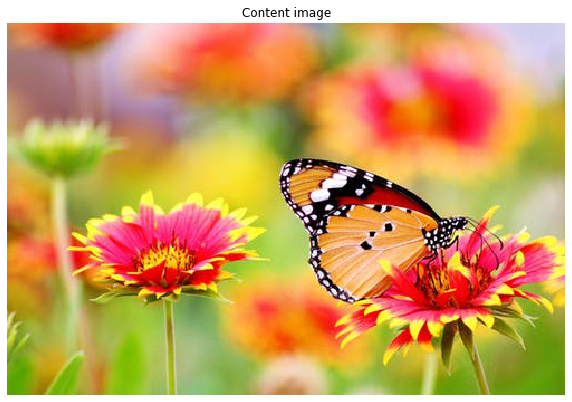

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
img = plt.imread(CONTENT_IMAGE_FN)
plt.axis('off')
plt.title('Content image')
plt.imshow(img)

# Style Image

Run the below cell to upload the Style Image. Make sure to select **just 1 image**

In [0]:
style_img = files.upload()

Saving style4.jpg to style4.jpg


In [0]:
STYLE_IMAGE_FN = list(style_img)[0]
STYLE_IMAGE_FN_temp = STYLE_IMAGE_FN.strip().replace(" ", "_")

if STYLE_IMAGE_FN != STYLE_IMAGE_FN_temp:
  os.rename(STYLE_IMAGE_FN, STYLE_IMAGE_FN_temp)
  STYLE_IMAGE_FN = STYLE_IMAGE_FN_temp
  
print("Style image filename :", STYLE_IMAGE_FN)

Style image filename : style4.jpg


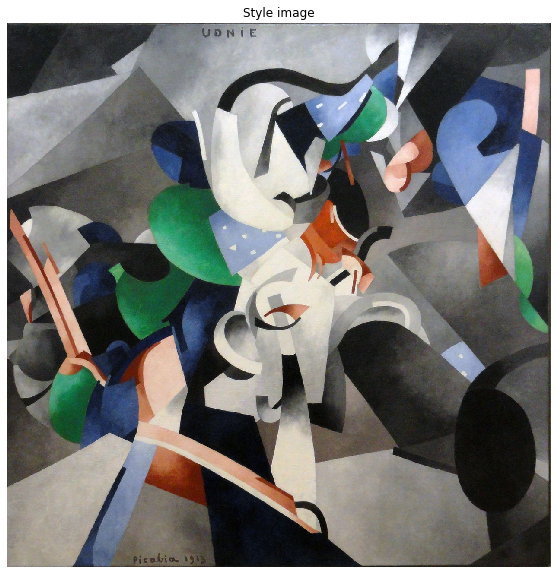

In [0]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(STYLE_IMAGE_FN)
plt.axis('off')
plt.title('Style image')
plt.imshow(img)

# Generate Image

Run the below cells to generate the image

In [0]:
import os

RESULT_DIR = "generated/"
RESULT_PREFIX = RESULT_DIR + "gen"
FINAL_IMAGE_PATH = RESULT_PREFIX + "_at_iteration_%d.png" % (NUM_ITERATIONS)

if not os.path.exists(RESULT_DIR):
  os.makedirs(RESULT_DIR)

In [0]:
!python {dir_path}/{NETWORK} {CONTENT_IMAGE_FN} {STYLE_IMAGE_FN} {RESULT_PREFIX} \
  --image_size {IMAGE_SIZE} --content_weight {CONTENT_WEIGHT} --style_weight \
  {STYLE_WEIGHT} --style_scale {STYLE_SCALE} --total_variation_weight \
  {TOTAL_VARIATION_WEIGHT} --content_loss_type {CONTENT_LOSS_TYPE} --num_iter \
  {NUM_ITERATIONS} --model {MODEL} --rescale_image {RESCALE_IMAGE} \
  --maintain_aspect_ratio {MAINTAIN_ASPECT_RATIO} --content_layer {CONTENT_LAYER} \
  --init_image {INITIALIZATION_IMAGE} --pool_type {POOLING_TYPE} --preserve_color \
  {PRESERVE_COLOR} --min_improvement {MIN_IMPROVEMENT}

Using TensorFlow backend.




80142336/80134624 [==============================] - 2s 0us/step



2020-02-26 19:17:27.143633: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX512F
2020-02-26 19:17:27.155271: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000165000 Hz
2020-02-26 19:17:27.158556: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x6462e00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-02-26 19:17:27.158588: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-02-26 19:17:27.164498: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-02-26 19:17:27.344661: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but th

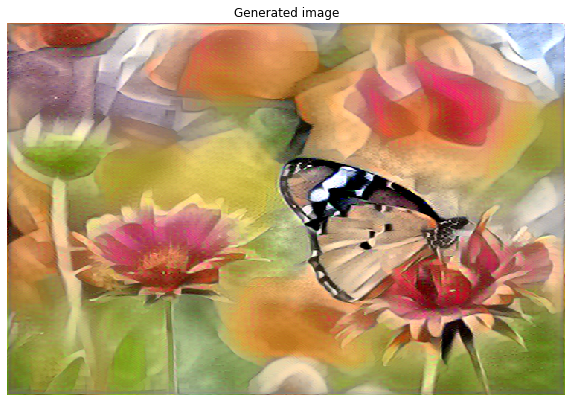

In [0]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(FINAL_IMAGE_PATH)
plt.axis('off')
plt.title('Generated image')
plt.imshow(img)

# Download Generated Image

Run the following cell to download the final result

In [0]:
files.download(FINAL_IMAGE_PATH)